In [39]:
import pandas as pd

In [40]:
pip install hampel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hampel: filename=hampel-1.0.2-cp38-cp38-linux_x86_64.whl size=236619 sha256=151cc6b15e4a565aa366726afa85d69311fbf87cb1b0cb67bf70229384ebcc4f
  Stored in directory: /home/lcscrv/.cache/pip/wheels/59/0c/92/7bf70b53b36c60b5d87fcd9dc468ba3b1b74b7893ac5f9f544
Successfully built hampel
Note: you may need to restart the kernel to use updated packages.


In [21]:
df = pd.read_csv('../data/04_feature/gdp_ts_fe.csv') 

In [22]:
single_df = df[['aruba','year']]
single_df

,aruba,year
0,8.2,1980-12-31
1,-0.9,1981-12-31
2,-2.3,1982-12-31
3,8.0,1983-12-31
4,5.9,1984-12-31
5,1.1,1985-12-31
6,5.9,1986-12-31
7,16.1,1987-12-31
8,18.6,1988-12-31
9,12.1,1989-12-31


In [174]:
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mase,rmse,mae
from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset

In [5]:
air_df = AirPassengersDataset().load()
air_df

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [126]:
dataset_ts = single_df.copy()
dataset_ts = TimeSeries.from_dataframe(df=dataset_ts, 
                                             time_col='year', 
                                             value_cols='aruba')

In [7]:
dataset_ts

<TimeSeries (DataArray) (year: 49, component: 1, sample: 1)>
array([[[  8.2]],

       [[ -0.9]],

       [[ -2.3]],

       [[  8. ]],

       [[  5.9]],

       [[  1.1]],

       [[  5.9]],

       [[ 16.1]],

       [[ 18.6]],

       [[ 12.1]],

...

       [[ -2.3]],

       [[-24. ]],

       [[ 27.6]],

       [[ 10.5]],

       [[  2.3]],

       [[  1.2]],

       [[  1.2]],

       [[  1.1]],

       [[  1.1]],

       [[  1.1]]])
Coordinates:
  * year       (year) datetime64[ns] 1980-12-31 1981-12-31 ... 2028-12-31
  * component  (component) object 'aruba'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

<Axes: xlabel='year'>

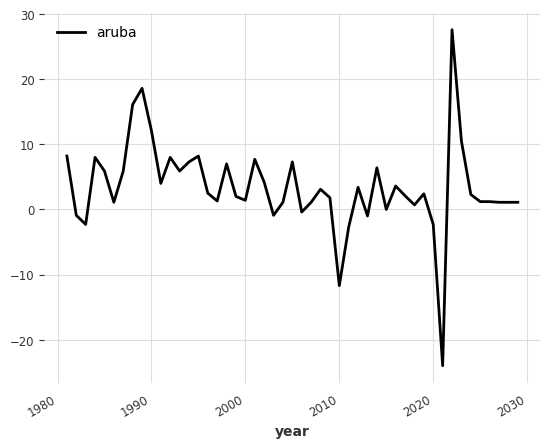

In [8]:
dataset_ts.plot()

In [42]:
single_df['aruba']

0      8.2
1     -0.9
2     -2.3
3      8.0
4      5.9
5      1.1
6      5.9
7     16.1
8     18.6
9     12.1
10     4.0
11     8.0
12     5.9
13     7.3
14     8.2
15     2.5
16     1.3
17     7.0
18     2.0
19     1.4
20     7.7
21     4.2
22    -0.9
23     1.1
24     7.3
25    -0.4
26     1.1
27     3.1
28     1.8
29   -11.7
30    -2.7
31     3.4
32    -1.0
33     6.4
34     0.0
35     3.6
36     2.1
37     0.7
38     2.4
39    -2.3
40   -24.0
41    27.6
42    10.5
43     2.3
44     1.2
45     1.2
46     1.1
47     1.1
48     1.1
Name: aruba, dtype: float64

In [62]:
from hampel import hampel

filtered_data =  hampel(single_df['aruba'],window_size = 7,n_sigma = 3.0,inplace = True)

In [67]:
print("Outlier Indices: ",filtered_data.filtered_data)

Outlier Indices:  0      8.2
1     -0.9
2     -2.3
3      8.0
4      5.9
5      1.1
6      5.9
7     16.1
8     18.6
9     12.1
10     4.0
11     8.0
12     5.9
13     7.3
14     8.2
15     2.5
16     1.3
17     7.0
18     2.0
19     1.4
20     7.7
21     4.2
22    -0.9
23     1.1
24     7.3
25    -0.4
26     1.1
27     3.1
28     1.8
29     1.1
30    -2.7
31     3.4
32    -1.0
33     6.4
34     0.0
35     3.6
36     2.1
37     0.7
38     2.4
39    -2.3
40     2.3
41     2.3
42    10.5
43     2.3
44     1.2
45     1.2
46     1.1
47     1.1
48     1.1
dtype: float32


In [68]:
new_df = single_df.copy()
new_df['aruba'] = filtered_data.filtered_data
new_df

,aruba,year
0,8.2,1980-12-31
1,-0.9,1981-12-31
2,-2.3,1982-12-31
3,8.0,1983-12-31
4,5.9,1984-12-31
5,1.1,1985-12-31
6,5.9,1986-12-31
7,16.1,1987-12-31
8,18.6,1988-12-31
9,12.1,1989-12-31


In [147]:
dataset_ts = new_df.copy()
dataset_ts = TimeSeries.from_dataframe(df=dataset_ts, 
                                             time_col='year', 
                                             value_cols='aruba')

<Axes: xlabel='year'>

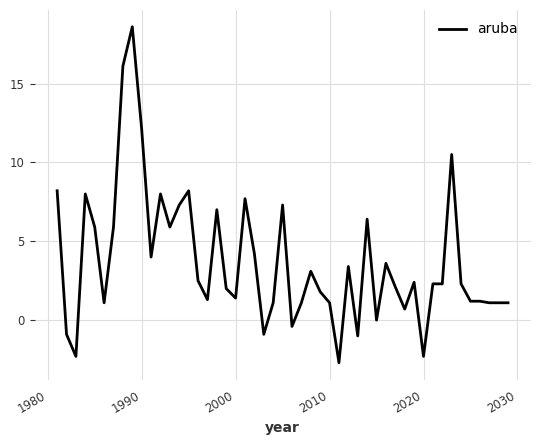

In [148]:
dataset_ts.plot()

In [156]:
scaler = Scaler()

aruba_df_scaled = scaler.fit_transform(dataset_ts)

<Axes: xlabel='year'>

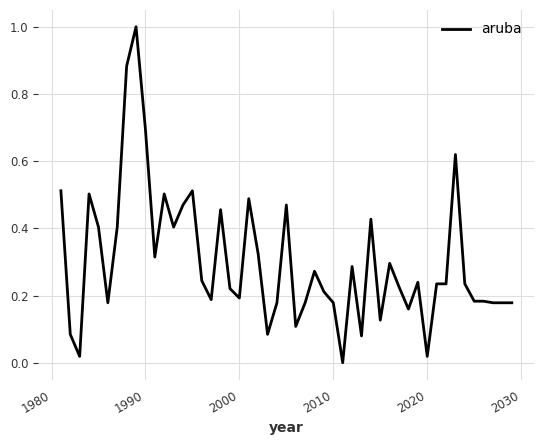

In [157]:
aruba_df_scaled.plot()

In [11]:
len(aruba_df_scaled)

49

In [12]:
aruba_df_scaled[:-14]

<TimeSeries (DataArray) (year: 35, component: 1, sample: 1)>
array([[[0.62403101]],

       [[0.44767442]],

       [[0.42054264]],

       [[0.62015504]],

       [[0.57945736]],

       [[0.48643411]],

       [[0.57945736]],

       [[0.77713178]],

       [[0.8255814 ]],

       [[0.6996124 ]],

...

       [[0.45736434]],

       [[0.48643411]],

       [[0.5251938 ]],

       [[0.5       ]],

       [[0.23837209]],

       [[0.4127907 ]],

       [[0.53100775]],

       [[0.44573643]],

       [[0.58914729]],

       [[0.46511628]]])
Coordinates:
  * year       (year) datetime64[ns] 1980-12-31 1981-12-31 ... 2014-12-31
  * component  (component) object 'aruba'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [180]:
train,val = aruba_df_scaled[:-14],aruba_df_scaled[-14:]

In [181]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# stop training when validation loss does not decrease more than 0.05 (`min_delta`) over
# a period of 5 epochs (`patience`)
my_stopper = EarlyStopping(
    monitor="train_loss",
    patience=5,
    min_delta=1.0e-06,
    mode='min',
)

pl_trainer_kwargs={"callbacks": [my_stopper]}

In [182]:
model = NBEATSModel(
    input_chunk_length=4, output_chunk_length=2,n_epochs=500, random_state=0,log_tensorboard = True,pl_trainer_kwargs=pl_trainer_kwargs
)

In [183]:
def eval_metrics(actual, pred,train):
    ts_rmse = rmse(actual,pred)
    ts_mae = mae(actual, pred)
    ts_mase = mase(actual, pred,train)
    return ts_rmse, ts_mae, ts_mase

In [184]:
import mlflow.pytorch
from mlflow import MlflowClient

# Train the model
with mlflow.start_run():
        model.fit(train, val_series = val,verbose=True)
        preds = model.predict(n=14)
        
        (ts_rmse, ts_mae, ts_mase) = eval_metrics(aruba_df_scaled, preds,train)

        print(f"  RMSE: {ts_rmse}")
        print(f"  MAE: {ts_mae}")
        print(f"  MASE: {ts_mase}")

        mlflow.log_metric("rmse", ts_rmse)
        mlflow.log_metric("mae", ts_mae)
        mlflow.log_metric("mase", ts_mase)

        

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.0 M 
---------------------------------------------------
6.0 M     Trainable params
1.3 K     Non-trainable params
6.0 M     Total params
24.151    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/lcscrv/projetos/pessoais/gdp_time_series/venv/lib/python3.8/site-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

  RMSE: 0.21433375775814056
  MAE: 0.16434434056282043
  MASE: 0.7892451882362366


In [161]:
 model.fit(train, val_series = val,verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.0 M 
---------------------------------------------------
6.0 M     Trainable params
1.3 K     Non-trainable params
6.0 M     Total params
24.151    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/lcscrv/projetos/pessoais/gdp_time_series/venv/lib/python3.8/site-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=4, output_chunk_length=2, n_epochs=500, random_state=0, log_tensorboard=True, pl_trainer_kwargs={'callbacks': [<pytorch_lightning.callbacks.early_stopping.EarlyStopping object at 0x7f0a8a470fd0>]})

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

MASE = 0.79


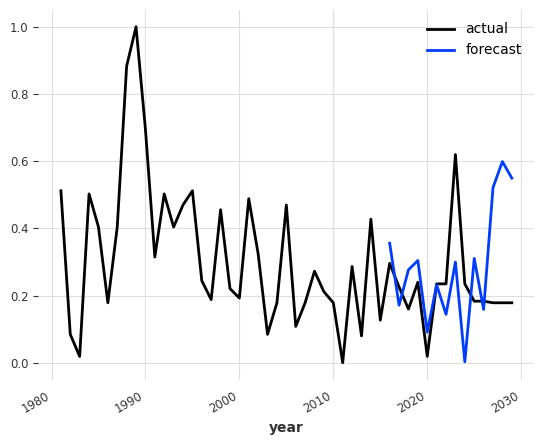

In [164]:
import matplotlib.pyplot as plt
pred = model.predict(n=14)

aruba_df_scaled.plot(label="actual")
pred.plot(label="forecast")
plt.legend()
print("MASE = {:.2f}".format(mase(aruba_df_scaled, pred,train)))

/home/lcscrv/projetos/pessoais/gdp_time_series/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lcscrv/projetos/pessoais/gdp_time_series/venv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


MASE = nan


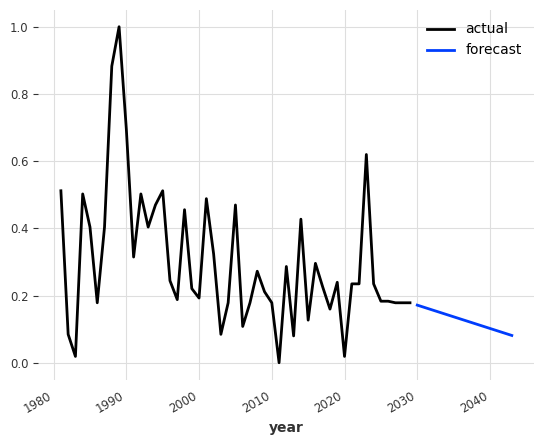

In [167]:
from darts.models import NaiveDrift

naive_model = NaiveDrift()
naive_model.fit(aruba_df_scaled)
n_pred = naive_model.predict(n=14)
aruba_df_scaled.plot(label="actual")
n_pred.plot(label="forecast")
plt.legend()
print("MASE = {:.2f}".format(mase(aruba_df_scaled, n_pred,aruba_df_scaled)))

In [18]:
 parameters = {
            "input_chunk_length": [5, 10,15,20,25],
            "output_chunk_length": [4],
            "num_stacks": [16, 30],
            "num_blocks": [1, 2, 3, 5, 10],
            "num_layers": [2, 3, 4],
            "layer_widths": [256, 512, 1024],
            "n_epochs": [20,50,100],
            "nr_epochs_val_period": [1],
            "random_state": [0],
        }

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2